<center>
<b><font size=6>Industry 4.0 의 중심, AI - ML&DL</font></b>
</center>

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Machine Learning

### <font color='blue'>Linear Regression</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

# w = 0.5
# b = 0.5

In [3]:
for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

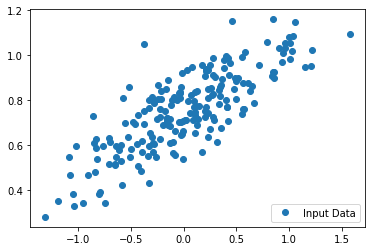

In [4]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [5]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

In [6]:
# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
model = tf.global_variables_initializer()


 y = [-0.33187556] x + [0.7658054] 


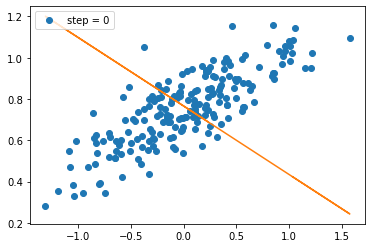


 y = [0.15707085] x + [0.7551498] 


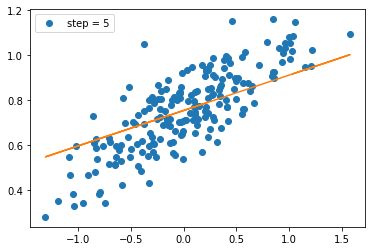


 y = [0.2434063] x + [0.75331193] 


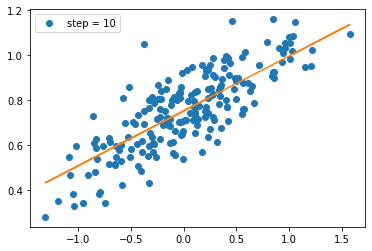


 y = [0.25865075] x + [0.7529874] 


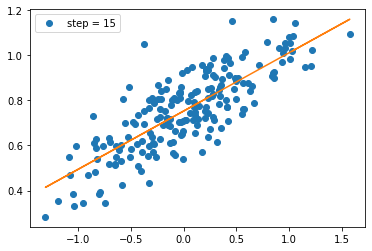


 y = [0.26134253] x + [0.7529301] 


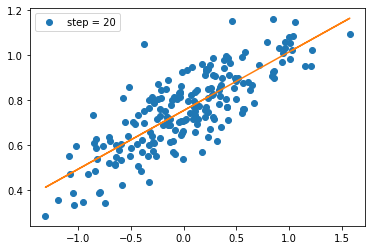

In [7]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,21):
        sess.run(train)
        if (step % 5) == 0:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()

In [8]:
# ! conda install input_data

In [9]:
# import input_data
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# import input_data

In [28]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                pass
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                pass
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 
    

In [29]:
%ls MNIST_data

 D 드라이브의 볼륨: Samsung_T5
 볼륨 일련 번호: 844F-BA7F

 D:\project\itech_lab\_jbfg-ds22\ds22-ipynb\s91-machine-learning\MNIST_data 디렉터리

2019-09-10  오전 01:16    <DIR>          .
2019-09-10  오전 01:16    <DIR>          ..
2019-05-03  오전 02:54         1,648,877 t10k-images-idx3-ubyte.gz
2019-05-03  오전 02:54             4,542 t10k-labels-idx1-ubyte.gz
2019-05-03  오전 02:54         9,912,422 train-images-idx3-ubyte.gz
2019-05-03  오전 02:54            28,881 train-labels-idx1-ubyte.gz
               4개 파일          11,594,722 바이트
               2개 디렉터리  139,580,276,736 바이트 남음


In [30]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
# input_path = '../input'
# training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
# training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
# test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
# test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


# input_path = './MNIST_data'
# training_images_filepath = join(input_path, 'train-images-idx3-ubyte.gz')
# training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte.gz')
# test_images_filepath = join(input_path, 't10k-images-idx3-ubyte.gz')
# test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte.gz')

input_path = 'MNIST_data\\'
input_path = './MNIST_data/'
training_images_filepath =input_path + 'train-images-idx3-ubyte.gz'
training_labels_filepath =input_path + 'train-labels-idx1-ubyte.gz'
test_images_filepath =input_path + 't10k-images-idx3-ubyte.gz'
test_labels_filepath =input_path + 't10k-labels-idx1-ubyte.gz'

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)


MemoryError: 

In [ ]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

import sys ; sys.path.append('..')  # useful if you're running locally
import mnist1d

from mnist1d.data import get_templates, get_dataset_args, get_dataset
from mnist1d.train import get_model_args, train_model
from mnist1d.models import ConvBase, GRUBase, MLPBase, LinearBase
from mnist1d.utils import set_seed, plot_signals, ObjectView, from_pickle

# Try attaching to GPU
DEVICE = str(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
print('Using:', DEVICE)

In [ ]:
mnist_images = input_data.read_data_sets("MNIST_data/",one_hot=False)
pixels,real_values = mnist_images.train.next_batch(10)

In [ ]:
print("list of values loaded ", real_values)
example_to_visualize = 5
print("element N " + str(example_to_visualize + 1) + " of the list plotted")

In [ ]:
image = pixels[example_to_visualize,:]
image = np.reshape(image, [28,28])
plt.imshow(image)
plt.show()

<h3>KNN</h3>

In [ ]:
import numpy as np
import tensorflow as tf
import input_data

In [ ]:
#학습 데이터 집합 제작
mnist = input_data.read_data_sets("./tmp/data/", one_hot=True)

In [ ]:
train_pixels,train_list_values = mnist.train.next_batch(100)
test_pixels,test_list_of_values = mnist.test.next_batch(10)
train_pixel_tensor = tf.placeholder("float", [None, 784])
test_pixel_tensor = tf.placeholder("float", [784])

In [ ]:
# 비용 함수와 거리 최적화
distance = tf.reduce_sum(tf.abs(tf.add(train_pixel_tensor,tf.negative(test_pixel_tensor))),reduction_indices=1)

In [ ]:
pred = tf.arg_min(distance, 0)

In [ ]:
# 테스트와 알고리즘 평가
accuracy = 0

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(test_list_of_values)):
        nn_index = sess.run(pred,feed_dict={train_pixel_tensor:train_pixels,test_pixel_tensor:test_pixels[i,:]})
        print("Test N° ", i,"Predicted Class: ", np.argmax(train_list_values[nn_index]),"True Class: ", np.argmax(test_list_of_values[i]))
        if np.argmax(train_list_values[nn_index]) == np.argmax(test_list_of_values[i]):
            accuracy += 1./len(test_pixels)
        print("Result = ", accuracy)

<h3>K-Means</h3>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
num_vectors = 1000
num_clusters = 4
num_steps = 100

In [ ]:
x_values = []
y_values = []
vector_values = []

In [ ]:
for i in range(num_vectors):
    if np.random.random() > 0.5:
        x_values.append(np.random.normal(0.4, 0.7))
        y_values.append(np.random.normal(0.2, 0.8))
    else:
        x_values.append(np.random.normal(0.6, 0.4))
        y_values.append(np.random.normal(0.8, 0.5))

In [ ]:
vector_values = list(zip(x_values,y_values))
vectors = tf.constant(vector_values)

In [ ]:
plt.plot(x_values,y_values, 'o', label='Input Data')
plt.legend()
plt.show()

In [ ]:
n_samples = tf.shape(vector_values)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))

In [ ]:
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters

In [ ]:
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values, centroid_indices))

In [ ]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

In [ ]:
vectors_subtration = tf.subtract(expanded_vectors,expanded_centroids)

In [ ]:
euclidean_distances = tf.reduce_sum(tf.square(vectors_subtration), 2)
assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))

In [ ]:
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

In [ ]:
update_centroids = tf.concat([tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions],0)

In [ ]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [ ]:
for step in range(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroids,centroids,assignments])

In [ ]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
        labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame(dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

In [ ]:
display_partition(x_values,y_values,assignment_values)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
        labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame(dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

In [ ]:
num_vectors = 2000
num_clusters = 4
n_samples_per_cluster = 500
num_steps = 1000
x_values = []
y_values = []
vector_values = []

In [ ]:
# 랜덤한 데이터 생성
for i in range(num_vectors):
    if np.random.random() > 0.5:
        x_values.append(np.random.normal(0.4, 0.7))
        y_values.append(np.random.normal(0.2, 0.8))
    else:
        x_values.append(np.random.normal(0.6, 0.4))
        y_values.append(np.random.normal(0.8, 0.5))

In [ ]:
vector_values = list(zip(x_values,y_values))
vectors = tf.constant(vector_values)
n_samples = tf.shape(vector_values)[0]

In [ ]:
random_indices = tf.random_shuffle(tf.range(0, n_samples))
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values,centroid_indices))

In [ ]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)
vectors_subtration = tf.subtract(expanded_vectors,expanded_centroids)

In [ ]:
euclidean_distances = tf.reduce_sum(tf.square(vectors_subtration), 2)
assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))
partitions = [0, 0, 1, 1, 0]
num_partitions = 2
data = [10, 20, 30, 40, 50]

In [ ]:
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)
update_centroids = tf.concat([tf.expand_dims (tf.reduce_mean(partition, 0), 0) for partition in partitions], 0)

In [ ]:
init_op = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(init_op)
for step in range(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])
display_partition(x_values,y_values,assignment_values)
plt.plot(x_values,y_values, 'o', label='Input Data')
plt.legend()
plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>